## Decision Tree Baseline Model

In [216]:
import pandas as pd

crashes_cleaned = pd.read_csv('../data/crashes_cleaned.csv', index_col = 0)
crashes_cleaned.head()

,CRASH_RECORD_ID,POSTED_SPEED_LIMIT,CRASH_TYPE,INTERSECTION_RELATED_I,NOT_RIGHT_OF_WAY_I,HIT_AND_RUN_I,DAMAGE,PRIM_CONTRIBUTORY_CAUSE,NUM_UNITS,CRASH_HOUR,...,ROAD_DEFECT_NO DEFECTS,ROAD_DEFECT_OTHER,"ROAD_DEFECT_RUT, HOLES",ROAD_DEFECT_SHOULDER DEFECT,ROAD_DEFECT_UNKNOWN,ROAD_DEFECT_WORN SURFACE,MOST_SEVERE_INJURY_INCAPACITATING INJURY,MOST_SEVERE_INJURY_NO INDICATION OF INJURY,MOST_SEVERE_INJURY_NONINCAPACITATING INJURY,"MOST_SEVERE_INJURY_REPORTED, NOT EVIDENT"
2,5f54a59fcb087b12ae5b1acff96a3caf4f2d37e79f8db4...,30,1,0,0,1,2,BAD DRIVING,4,14,...,1,0,0,0,0,0,0,1,0,0
46,c107aea0fb8320ca5e7676759af9399cffe67f3ac8e429...,30,1,0,0,1,2,BAD DRIVING,2,17,...,1,0,0,0,0,0,0,1,0,0
56,db61137bc4bb19b84665da12c4c367592e874c623f76a1...,30,0,0,0,0,2,BAD DRIVING,3,18,...,1,0,0,0,0,0,0,1,0,0
63,8640aa03a86f10df7a8c1dafc03d1551c4a4c0262397f3...,30,1,0,0,1,2,BAD DRIVING,2,11,...,1,0,0,0,0,0,0,1,0,0
74,f1779af8b006d956f29723ac415bd54b61ef9acf84e38e...,30,1,1,0,1,2,BREAKING LAW,2,15,...,0,0,0,0,1,0,0,1,0,0


In [217]:
crashes_cleaned['PRIM_CONTRIBUTORY_CAUSE'].value_counts(normalize=True)

BAD DRIVING                   0.622616
BREAKING LAW                  0.257843
OUTSIDE FACTORS               0.063773
DRINKING/DRUGS                0.033166
DISTRACTION INSIDE VEHICLE    0.016300
OTHER                         0.006302
Name: PRIM_CONTRIBUTORY_CAUSE, dtype: float64

In [218]:
# label encoding target variable
from sklearn.preprocessing import LabelEncoder

label = LabelEncoder()

crashes_cleaned['PRIM_CONTRIBUTORY_CAUSE'] = label.fit_transform(crashes_cleaned['PRIM_CONTRIBUTORY_CAUSE'])
crashes_cleaned

,CRASH_RECORD_ID,POSTED_SPEED_LIMIT,CRASH_TYPE,INTERSECTION_RELATED_I,NOT_RIGHT_OF_WAY_I,HIT_AND_RUN_I,DAMAGE,PRIM_CONTRIBUTORY_CAUSE,NUM_UNITS,CRASH_HOUR,...,ROAD_DEFECT_NO DEFECTS,ROAD_DEFECT_OTHER,"ROAD_DEFECT_RUT, HOLES",ROAD_DEFECT_SHOULDER DEFECT,ROAD_DEFECT_UNKNOWN,ROAD_DEFECT_WORN SURFACE,MOST_SEVERE_INJURY_INCAPACITATING INJURY,MOST_SEVERE_INJURY_NO INDICATION OF INJURY,MOST_SEVERE_INJURY_NONINCAPACITATING INJURY,"MOST_SEVERE_INJURY_REPORTED, NOT EVIDENT"
2,5f54a59fcb087b12ae5b1acff96a3caf4f2d37e79f8db4...,30,1,0,0,1,2,0,4,14,...,1,0,0,0,0,0,0,1,0,0
46,c107aea0fb8320ca5e7676759af9399cffe67f3ac8e429...,30,1,0,0,1,2,0,2,17,...,1,0,0,0,0,0,0,1,0,0
56,db61137bc4bb19b84665da12c4c367592e874c623f76a1...,30,0,0,0,0,2,0,3,18,...,1,0,0,0,0,0,0,1,0,0
63,8640aa03a86f10df7a8c1dafc03d1551c4a4c0262397f3...,30,1,0,0,1,2,0,2,11,...,1,0,0,0,0,0,0,1,0,0
74,f1779af8b006d956f29723ac415bd54b61ef9acf84e38e...,30,1,1,0,1,2,1,2,15,...,0,0,0,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
798899,ffffc0eaf9bc22a04bf318b62e0e1c5ec59a4f3c0c3493...,30,1,0,0,1,0,0,2,12,...,1,0,0,0,0,0,0,1,0,0
798901,ffffc802346fd6f48f99117898fbc558237a3052c327b8...,30,0,0,0,0,2,3,2,7,...,1,0,0,0,0,0,0,0,0,1
798902,ffffd143cf6dc784876069140869d2d724080089450108...,30,1,0,0,1,2,0,2,19,...,0,0,0,0,1,0,0,1,0,0
798904,ffffe577251dc1cc67f2f823b595e5028427a210e2a40e...,30,1,0,0,1,1,1,2,8,...,1,0,0,0,0,0,0,1,0,0


In [219]:
# create X and y and train test split
from sklearn.model_selection import train_test_split

X = crashes_cleaned.drop(columns = ['PRIM_CONTRIBUTORY_CAUSE', 'CRASH_RECORD_ID'])
y = crashes_cleaned['PRIM_CONTRIBUTORY_CAUSE']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30)

In [221]:
X_train[0:5].shape

(5, 125)

In [220]:
y_train.value_counts(normalize = True)

0    0.622578
1    0.257867
5    0.064101
3    0.032961
2    0.016234
4    0.006258
Name: PRIM_CONTRIBUTORY_CAUSE, dtype: float64

In [222]:
# # import tree and instantiate and fit baseline model
# from sklearn.tree import DecisionTreeClassifier

# clf = DecisionTreeClassifier()

# clf.fit(X_train, y_train)

DecisionTreeClassifier()

In [226]:
from sklearn.model_selection import KFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
import numpy as np

def cross_validation(X_train, y_train, num_split=10):
    score_train_list = []
    score_val_list = []

    for train_index, valid_index in KFold(n_splits=num_split).split(X_train):
        # Train and validation splitting
        X_train_fold, X_val_fold = X_train.iloc[train_index], X_train.iloc[valid_index]
        y_train_fold, y_val_fold = y_train.iloc[train_index], y_train.iloc[valid_index]

        # Create/fit decision tree classifier
        clf = DecisionTreeClassifier(max_depth = 15, min_samples_leaf = 39, min_samples_split = 50)
        clf.fit(X_train_fold, y_train_fold)

        # Evaluate performance
        accuracy_train = clf.score(X_train_fold, y_train_fold)
        accuracy_val = clf.score(X_val_fold, y_val_fold)
        score_val_list.append(accuracy_val)
        score_train_list.append(accuracy_train)

    return {'train': np.mean(score_train_list), 'validation': np.mean(score_val_list)}

result = cross_validation(X_train, y_train, num_split=10)
print(result)

{'train': 0.7460863874141145, 'validation': 0.7360971620234202}


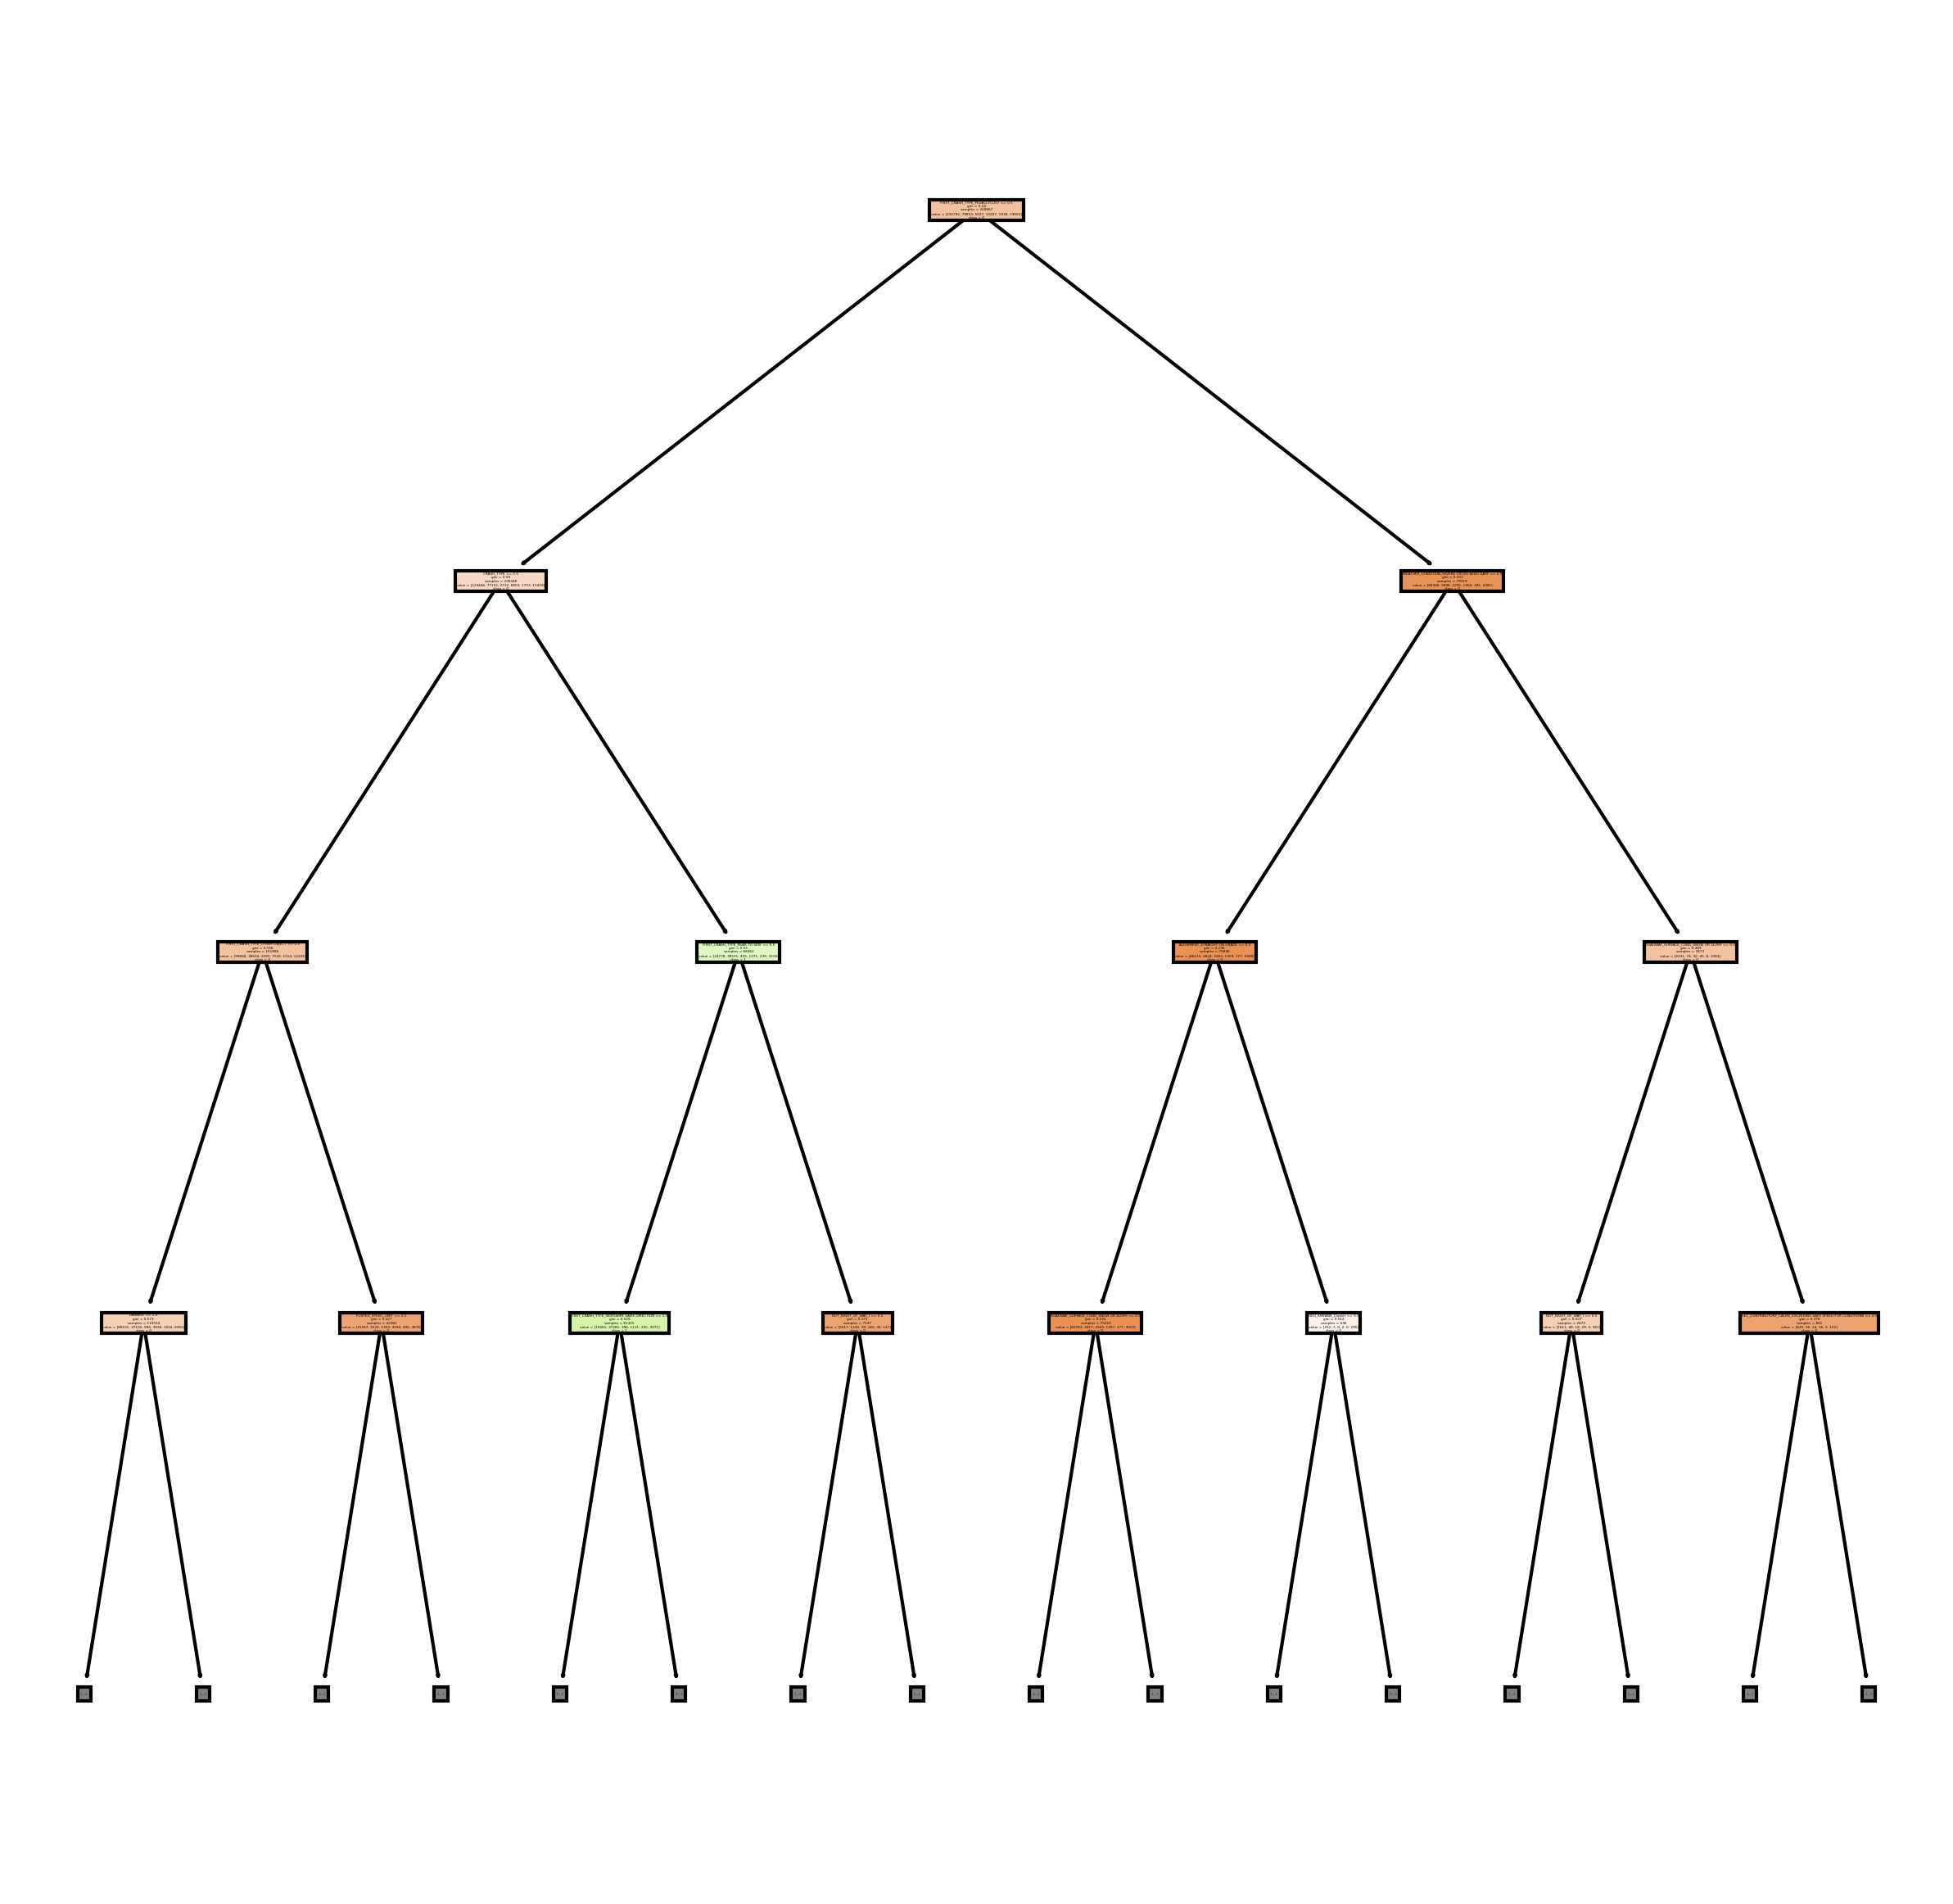

In [223]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

fig, axes = plt.subplots(nrows = 1,ncols = 1, figsize = (10,10), dpi=300)
plot_tree(clf,
           max_depth = 3,
           feature_names = crashes_cleaned.columns, 
           class_names=np.unique(y).astype('str'),
           filled = True,
           ax = axes)
plt.show()

In [230]:
from sklearn.metrics import accuracy_score

y_preds = clf.predict(X_test)

print('Accuracy:', accuracy_score(y_test, y_preds))

y_pred_proba = clf.predict_proba(X_test)

from sklearn.metrics import roc_auc_score

auc_score = roc_auc_score(y_test, y_pred_proba,  multi_class='ovo')
print('AUC Score:', auc_score)

Accuracy: 0.28219116151150964
AUC Score: 0.4995451143067041


In [229]:
# build a model and change purity metric to entropy 

clf_entropy = DecisionTreeClassifier(criterion='entropy')

clf_entropy.fit(X_train, y_train)

y_preds_entropy = clf_entropy.predict(X_test)

print('Accuracy:', accuracy_score(y_test, y_preds_entropy))

Accuracy: 0.6255811325019779


In [228]:
from sklearn.preprocessing import StandardScaler
# scale the data lets see if it improves the score
scaler = StandardScaler()

X_train_sc = scaler.fit_transform(X_train)
X_test_sc = scaler.transform(X_test)

# try out both models on scaled data
clf.fit(X_train_sc, y_train)
y_preds_sc_gini = clf.predict(X_test_sc)
print('Accuracy gini scaled:', accuracy_score(y_test, y_preds_sc_gini))

clf_entropy.fit(X_train_sc, y_train)
y_preds_sc_entropy = clf_entropy.predict(X_test_sc)
print('Accuracy entropy scaled:', accuracy_score(y_test, y_preds_sc_entropy))

Accuracy gini scaled: 0.6254078288060883
Accuracy entropy scaled: 0.625226990166899


Scaling the data made miniscule difference i will not be using the scaled data.

In [231]:
# balance the class weights
clf_w = DecisionTreeClassifier(class_weight='balanced')
clf_w.fit(X_train, y_train)
y_preds_w = clf_w.predict(X_test)
print('Accuracy weighted:', accuracy_score(y_test, y_preds_w))

Accuracy weighted: 0.6221301284707833


In [232]:
y_pred_proba = clf.predict_proba(X_test)

from sklearn.metrics import roc_auc_score

auc_score = roc_auc_score(y_test, y_pred_proba,  multi_class='ovo')
print('AUC Score:', auc_score)

AUC Score: 0.4995451143067041


In [233]:
from imblearn.over_sampling import SMOTE

print('Original class distribution: \n')
print(y.value_counts())
smote = SMOTE()
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

print('-----------------------------------------')
print('Synthetic sample class distribution: \n')
print(pd.Series(y_train_resampled).value_counts())

Original class distribution: 

0    275434
1    114065
5     28212
3     14672
2      7211
4      2788
Name: PRIM_CONTRIBUTORY_CAUSE, dtype: int64
-----------------------------------------
Synthetic sample class distribution: 

5    192792
4    192792
3    192792
2    192792
1    192792
0    192792
Name: PRIM_CONTRIBUTORY_CAUSE, dtype: int64


In [234]:
# model with resampled training data using SMOTE
clf_resamp = DecisionTreeClassifier()

clf_resamp.fit(X_train_resampled, y_train_resampled)

y_preds_resamp = clf_resamp.predict(X_test)
print('Accuracy weighted:', accuracy_score(y_test, y_preds_resamp))

y_pred_proba_resamp = clf_resamp.predict_proba(X_test)
auc_score = roc_auc_score(y_test, y_pred_proba_resamp,  multi_class='ovo')
print('AUC Score:', auc_score)

Accuracy weighted: 0.5978374712730287
AUC Score: 0.5951564775904935


In [235]:
# ok this is bad lets do something else 
# find best depth
depth_list = [3, 5, 7, 9, 11, 13, 15, 17, 19, 21]

for depth in depth_list:
    
    clf_hyper = DecisionTreeClassifier(max_depth = depth, min_samples_split = 10)
    clf_hyper.fit(X_train, y_train)
    y_preds = clf_hyper.predict(X_test)
    print('Accuracy depth', depth,':', accuracy_score(y_test, y_preds))
    
    y_pred_proba = clf.predict_proba(X_test)
    auc_score = roc_auc_score(y_test, y_pred_proba,  multi_class='ovo')
    print('AUC Score', depth, ':', auc_score)

Accuracy depth 3 : 0.6795388614700675
AUC Score 3 : 0.4995451143067041
Accuracy depth 5 : 0.6951135892702407
AUC Score 5 : 0.4995451143067041
Accuracy depth 7 : 0.710454733828128
AUC Score 7 : 0.4995451143067041
Accuracy depth 9 : 0.7260746712880985
AUC Score 9 : 0.4995451143067041
Accuracy depth 11 : 0.7333006819123686
AUC Score 11 : 0.4995451143067041
Accuracy depth 13 : 0.7344685981237992
AUC Score 13 : 0.4995451143067041
Accuracy depth 15 : 0.7331575179896771
AUC Score 15 : 0.4995451143067041
Accuracy depth 17 : 0.7310778736390009
AUC Score 17 : 0.4995451143067041
Accuracy depth 19 : 0.7268130957314546
AUC Score 19 : 0.4995451143067041
Accuracy depth 21 : 0.7233545567569604
AUC Score 21 : 0.4995451143067041


In [237]:
# find best min samples split
minsamp_list = [15, 17, 19, 21, 23, 25, 27, 35]

for minsamp in minsamp_list:
    
    clf_hyper = DecisionTreeClassifier(max_depth = 15, min_samples_split = minsamp)
    clf_hyper.fit(X_train, y_train)
    y_preds = clf_hyper.predict(X_test)
    print('Accuracy ', minsamp,':', accuracy_score(y_test, y_preds))
    
y_pred_proba = clf.predict_proba(X_test)
auc_score = roc_auc_score(y_test, y_pred_proba,  multi_class='ovo')
print('AUC Score', minsamp, ':', auc_score)

Accuracy  15 : 0.7335568699845534
Accuracy  17 : 0.7336698941340466
Accuracy  19 : 0.7337527785103417
Accuracy  21 : 0.7336774290773462
Accuracy  23 : 0.73394868703613
Accuracy  25 : 0.7339562219794296
Accuracy  27 : 0.7340089665825265
Accuracy  35 : 0.7343631089176054
AUC Score 35 : 0.4995451143067041


In [238]:
minsamp_list = [37, 39, 41, 43, 45, 50]

for minsamp in minsamp_list:
    
    clf_hyper = DecisionTreeClassifier(max_depth = 15, min_samples_split = minsamp)
    clf_hyper.fit(X_train, y_train)
    y_preds = clf_hyper.predict(X_test)
    print('Accuracy ', minsamp,':', accuracy_score(y_test, y_preds))
    
y_pred_proba = clf.predict_proba(X_test)
auc_score = roc_auc_score(y_test, y_pred_proba,  multi_class='ovo')
print('AUC Test Score:', auc_score)

Accuracy  37 : 0.7343932486908036
Accuracy  39 : 0.7345364126134951
Accuracy  41 : 0.7344987378969974
Accuracy  43 : 0.7345740873299929
Accuracy  45 : 0.7347473910258825
Accuracy  50 : 0.7348754850619749
AUC Test Score: 0.4995451143067041


In [239]:
minsamp_list = [37, 39, 41, 43, 45, 50, 100]

for minsamp in minsamp_list:
    
    clf_hyper = DecisionTreeClassifier(max_depth = 15, min_samples_leaf = minsamp, min_samples_split = 50)
    clf_hyper.fit(X_train, y_train)
    y_preds = clf_hyper.predict(X_test)
    print('Accuracy ', minsamp,':', accuracy_score(y_test, y_preds))
    
y_pred_proba = clf.predict_proba(X_test)
auc_score = roc_auc_score(y_test, y_pred_proba,  multi_class='ovo')

Accuracy  37 : 0.7366612666239687
Accuracy  39 : 0.7369551294126512
Accuracy  41 : 0.7370982933353426
Accuracy  43 : 0.7373017368044306
Accuracy  45 : 0.7370907583920431
Accuracy  50 : 0.73663866179407
Accuracy  100 : 0.7367140112270655


In [240]:
clf_hyper = DecisionTreeClassifier(max_depth = 15, min_samples_leaf = 39, min_samples_split = 50)
clf_hyper.fit(X_train, y_train)
y_preds = clf_hyper.predict(X_test)
print('Accuracy:', accuracy_score(y_test, y_preds))

Accuracy: 0.7369551294126512
